# NLP Using R Studio: Online Sales Data

**Mr Fugu Data Science**

# (◕‿◕✿)

[Github](https://github.com/MrFuguDataScience)
[Youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw?view_as=subscriber)

# Purpose:
+ Learn basic NLP processing using `Quanteda`

# Outcome:

+ Separte Sentences into indivual words
+ Remove punctuation, stopwords, numbers
+ generate word frequencies
+ Plot: Word Cloud and Frequency Graph

# A Few Problems getting this started: as of *May 29, 2020*

`Inside Rstudio`:

+ If you have an older version of Rstudio like I did (3.4.*): Update is needed
+ Then Update R separately
+ then you will need to update all packages

`-------------------------------------------`

`Anaconda Jupyter Notebooks`:

+ Update Anaconda if you need to
+ Reinstall `IRKernel` inside Rstudio, and choose to get `devtools` also
+ Then everything will be as good as new, except you will need to install.packages(" ")
  for everything again inside Anaconda.

In [1]:
 
# install.packages("quanteda")
# library(quanteda)
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

In [2]:
install.packages("quanteda")
# install.packages("knitr")
# install.packages("tidyverse")




The downloaded binary packages are in
	/var/folders/b8/f7m05j2d0y3fsbqhndsc_qsw0000gn/T//RtmpeTS7L5/downloaded_packages


In [3]:
library(knitr)
# library(tidyr)
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Package version: 2.0.1

Parallel computing: 2 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [4]:
onlineretail<-read.csv("online_sales.csv")

In [5]:
head(onlineretail)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [6]:
# Removing Duplicate Rows: 
online_retail_am <- onlineretail %>% distinct()
head(online_retail_am)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [7]:
# remove_na

remove_na<-na.omit(online_retail_am)
head(remove_na)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [8]:
# Canceled Orders:
sort_countries<-remove_na[order(remove_na$Country,remove_na$Description),]

canceled_orders<-sort_countries[grep("C",sort_countries$InvoiceNo),]

head(canceled_orders)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
267920,C560540,22150,3 STRIPEY MICE FELTCRAFT,-1,7/19/2011 12:26,1.95,12415,Australia
267931,C560540,20979,36 PENCILS TUBE RED RETROSPOT,-1,7/19/2011 12:26,1.25,12415,Australia
267922,C560540,22138,BAKING SET 9 PIECE RETROSPOT,-1,7/19/2011 12:26,4.95,12415,Australia
267906,C560540,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267907,C560540,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267915,C560540,22973,CHILDREN'S CIRCUS PARADE MUG,-1,7/19/2011 12:26,1.65,12415,Australia


In [9]:
# Using If/Else Conditions: here we are convert a qty of >1 to 1, else 0.
sort_countries$CanceledQty <- ifelse(sort_countries$Quantity>=1, 1, 0)
head(sort_countries)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>
302520,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1
362626,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1
226306,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1
89387,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1
131085,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1
226294,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1


In [10]:
# Enabling Now to match rows and remove: this is because a canceled order usually
# has a corresponding value, unless it occured before dataset date range

canceled_orders$Quantity<-abs(canceled_orders$Quantity)
sort_countries$Quantity<-abs(sort_countries$Quantity)
# head(sort_countries)

In [11]:
fun<-sort_countries %>% 
  left_join(select(canceled_orders, CustomerID, StockCode, Quantity, Matches=Country)) %>% 
  mutate(Matches=ifelse(is.na(Matches), FALSE, TRUE))

Joining, by = c("StockCode", "Quantity", "CustomerID")



In [12]:
mm<-fun[!duplicated(fun),]

Order_Canceled<-mm[mm$Matches=='TRUE',] # corresponds to orginal match to canceled

Rest_ofData<-mm[mm$Matches=='FALSE',] # Orders that were never canceled

In [13]:
tail(Rest_ofData$Description)

[1] "SET/10 PINK POLKADOT PARTY CANDLES" "SET/10 RED POLKADOT PARTY CANDLES" 
[3] "TEA TIME DES TEA COSY"              "TEA TIME TEA SET IN GIFT BOX"      
[5] "TEA TIME TEAPOT IN GIFT BOX"        "VINTAGE RED TEATIME MUG"

In [14]:
# Convert text to Lower Case:

tail(lapply(Rest_ofData$Description,tolower))

prod_descr_lower<-lapply(Rest_ofData$Description,tolower)

[[1]]
[1] "set/10 pink polkadot party candles"

[[2]]
[1] "set/10 red polkadot party candles"

[[3]]
[1] "tea time des tea cosy"

[[4]]
[1] "tea time tea set in gift box"

[[5]]
[1] "tea time teapot in gift box"

[[6]]
[1] "vintage red teatime mug"

# Tokens: split sentence into words
+ By default, only removes whitespace, but can be used to remove punctuation as well as numbers.

`ex.) tokens(YOUR_TEXT_HERE, remove_punct = TRUE)`

In [15]:
# Convert to string:
z<-toString(prod_descr_lower)

In [16]:
#Create a Token, remove:(punctuation,symbols,numbers)
remove_punct<-tokens(z,remove_punct = TRUE,
remove_symbols = TRUE,remove_numbers =TRUE)

In [17]:
tail(remove_punct)

Tokens consisting of 1 document.
text1 :
 [1] "dolly"    "girl"     "beaker"   "i"        "love"     "london"  
 [7] "mini"     "backpack" "colour"   "spaceboy" "pen"      "pencil"  
[ ... and 1,638,002 more ]


# Stop Words: remove words having no meaning such as (the,and,where, etc)

`ex.) tokens_remove(your_tokens_here, pattern = stopwords('en')` 
or `tokens_select(your_tokens_here, pattern = stopwords('en'), selection = 'remove')`

In [18]:
stop_words_removed<-tokens_remove(remove_punct,pattern=stopwords('en'))

tail(tokens_remove(remove_punct,pattern=stopwords('en')))

Tokens consisting of 1 document.
text1 :
 [1] "dolly"    "girl"     "beaker"   "love"     "london"   "mini"    
 [7] "backpack" "colour"   "spaceboy" "pen"      "pencil"   "small"   
[ ... and 1,556,918 more ]


In [19]:
# Remove colors, because they are not relevant here since we only want to check common
# description words and get an idea of what comes up the most and has some meaning

toks_nostop <- tokens_remove(stop_words_removed,
                             c('red','white','blue','pink','orange','colour'))

toks_nostop

Tokens consisting of 1 document.
text1 :
 [1] "dolly"    "girl"     "beaker"   "love"     "london"   "mini"    
 [7] "backpack" "spaceboy" "pen"      "pencil"   "small"    "tube"    
[ ... and 1,470,364 more ]


# DFM:  Document Feature Matrix
+ Takes your tokens and converts to a matrix of document features.

`ex. 1) toks_inaug <- tokens(data_corpus_inaugural, remove_punct = TRUE)
dfmat_inaug <- dfm(toks_inaug)`

`ex. 2) dfm(corp_news, remove = stopwords('en'), remove_punct = TRUE)`

In [20]:
dfm_descriptions<-dfm(toks_nostop)
dfm_descriptions

Document-feature matrix of: 1 document, 2,001 features (0.0% sparse).
       features
docs    dolly girl beaker love london mini backpack spaceboy  pen pencil
  text1  6406 5962   1103 5840   3370 5824      555     8392 1782    833
[ reached max_nfeat ... 1,991 more features ]

In [21]:
# Number of features:

nfeat(dfm_descriptions)

[1] 2001

# dfm_select: removes features from your *(dfm)* based on a pattern

+ Think of (*stop words*) or terms of interest.

`ex.) dfm_select(dfmat_inaug, min_nchar = 5)`

In [22]:
dfm_select(dfm_descriptions,min_nchar = 5)

Document-feature matrix of: 1 document, 1,505 features (0.0% sparse).
       features
docs    dolly beaker london backpack spaceboy pencil small woodland pencils
  text1  6406   1103   3370      555     8392    833 10125     4843    3628
       features
docs    retrospot
  text1     25666
[ reached max_nfeat ... 1,495 more features ]

# Top Features: list words by frequency, using your *dfm*

`ex.) topfeatures(dfmat_inaug_long, 10)`

In [23]:
topfeatures(dfm_descriptions, 10)

set       bag     heart retrospot   vintage    design christmas       box 
    45644     36849     28700     25666     24979     22907     18653     17363 
     cake     metal 
    15573     15492

In [24]:
# Selecting based on frequency threshold:

dfm_trim(dfm_descriptions, min_termfreq = 13)

Document-feature matrix of: 1 document, 1,710 features (0.0% sparse).
       features
docs    dolly girl beaker love london mini backpack spaceboy  pen pencil
  text1  6406 5962   1103 5840   3370 5824      555     8392 1782    833
[ reached max_nfeat ... 1,700 more features ]

In [25]:
# Consider grouping words?

# Setup Word Cloud and Plot:

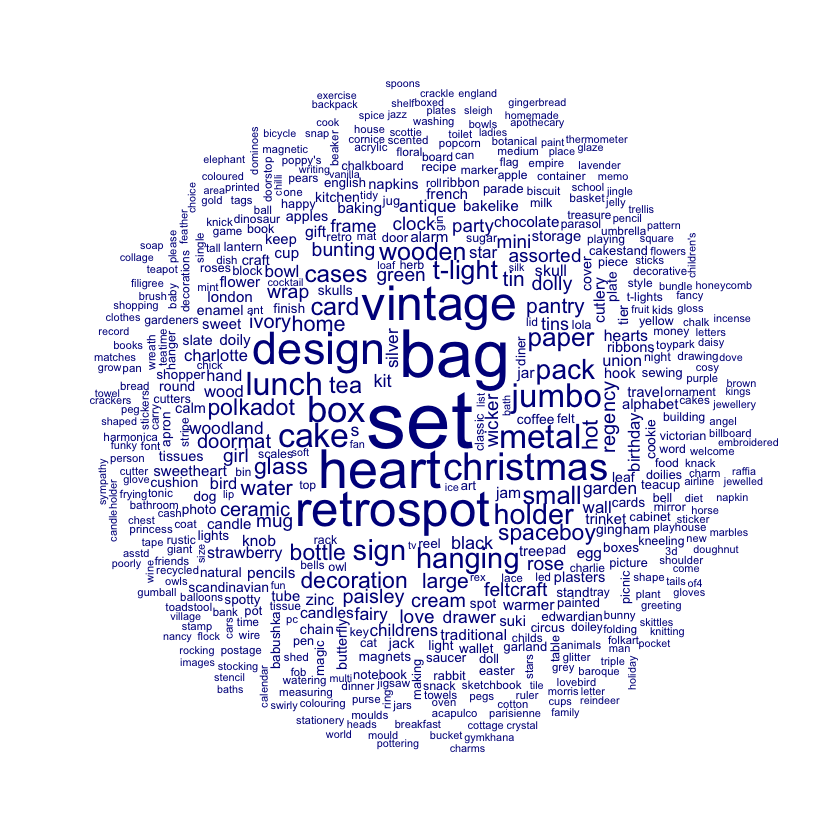

In [26]:
set.seed(132)
textplot_wordcloud(dfm_descriptions, min_count =13 )

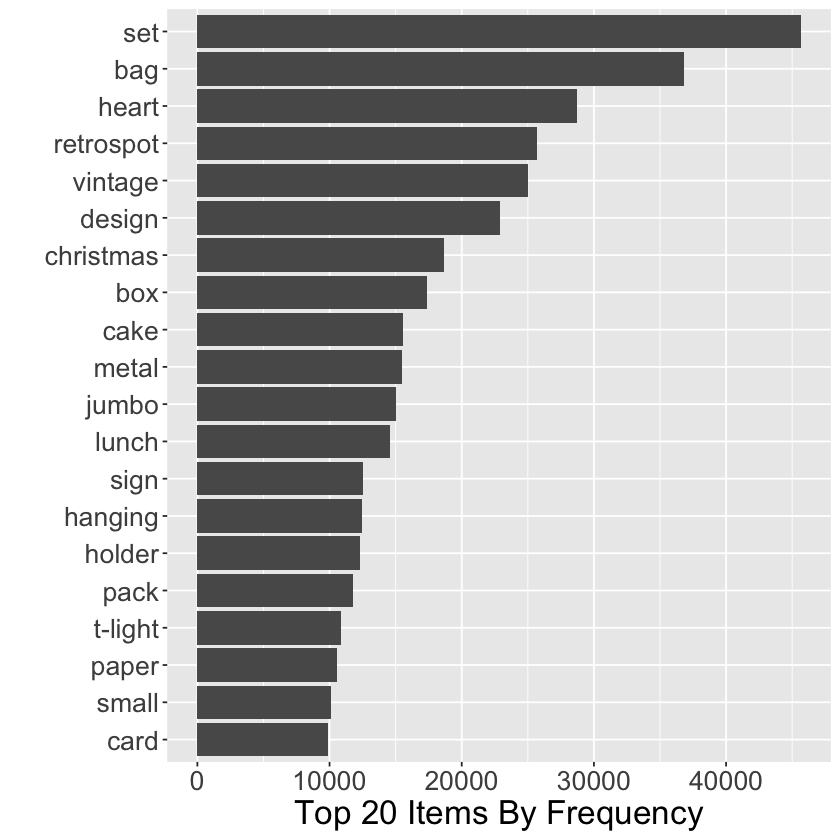

In [27]:
textstat_frequency(dfm_descriptions, n = 20) %>%
  ggplot(aes(x = reorder(feature, -rank), y = frequency)) +
  geom_bar(stat = "identity") + coord_flip() +
  labs(x = "", y = "Top 20 Items By Frequency")+
  theme(text = element_text(size=20))

# Citations: 

# ◔̯◔

# NLP

https://www.mjdenny.com/Text_Processing_In_R.html 

https://dept.stat.lsa.umich.edu/~jerrick/courses/stat701/notes/parallel.html

https://tutorials.quanteda.io/basic-operations/corpus/corpus_segment/

https://www.rdocumentation.org/packages/quanteda/versions/2.0.1/topics/topfeatures

https://www.rdocumentation.org/packages/quanteda/versions/2.0.1/topics/textplot_wordcloud

https://quanteda.io/articles/pkgdown/examples/plotting.html (word cloud examples)

# Plotting:

https://quanteda.io/reference/textplot_wordcloud.html

https://quanteda.io/articles/pkgdown/replication/digital-humanities.html

http://www.sthda.com/english/wiki/ggplot2-barplots-quick-start-guide-r-software-and-data-visualization

# Quanteda Cheat Sheet:

https://muellerstefan.net/files/quanteda-cheatsheet.pdf